In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

In [17]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try: 
                    path = os.path.join(label,f)
                    img  = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
        # Shuffle
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

PetImages/Cat


100%|██████████| 12501/12501 [00:14<00:00, 880.12it/s]


PetImages/Dog


100%|██████████| 12502/12502 [00:15<00:00, 798.48it/s]


Cats:  12476
Dogs:  12470


In [18]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [22]:
print("Training data length: " + str(len(training_data)))

Training data length: 24946


In [25]:
training_data[0][0]

array([[ 32,  32,  35, ..., 254, 255, 255],
       [ 85, 107,  27, ..., 254, 253, 253],
       [120, 162,  66, ..., 253, 253, 253],
       ...,
       [204, 182, 214, ...,  84,  97,  87],
       [ 75,  68,  93, ...,  82,  81,  62],
       [ 51,  50,  73, ..., 105,  79,  82]], dtype=uint8)

In [33]:
import matplotlib.pyplot as plt

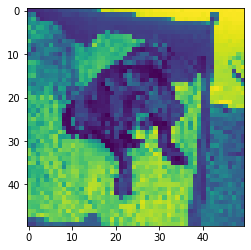

In [111]:
plt.imshow(training_data[0][0])
plt.show()

In [72]:
 len(training_data[0][1])

2

In [101]:
training_data[12444][0]

array([[  5,  23,  28, ...,  86, 134, 163],
       [141,  56,  46, ...,  90, 130, 166],
       [111, 135, 115, ...,  91, 118, 151],
       ...,
       [155, 155, 163, ...,  27,  44,  23],
       [154, 153, 164, ...,   5,  28,  23],
       [155, 154, 163, ...,  22,   9,   7]], dtype=uint8)

In [110]:
doge ='''─────────▄──────────────▄
────────▌▒█───────────▄▀▒▌
────────▌▒▒▀▄───────▄▀▒▒▒▐
───────▐▄▀▒▒▀▀▀▀▄▄▄▀▒▒▒▒▒▐
─────▄▄▀▒▒▒▒▒▒▒▒▒▒▒█▒▒▄█▒▐
───▄▀▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▀██▀▒▌
──▐▒▒▒▄▄▄▒▒▒▒▒▒▒▒▒▒▒▒▒▀▄▒▒▌
──▌▒▒▐▄█▀▒▒▒▒▄▀█▄▒▒▒▒▒▒▒█▒▐
─▐▒▒▒▒▒▒▒▒▒▒▒▌██▀▒▒▒▒▒▒▒▒▀▄▌
─▌▒▀▄██▄▒▒▒▒▒▒▒▒▒▒▒░░░░▒▒▒▒▌
─▌▀▐▄█▄█▌▄▒▀▒▒▒▒▒▒░░░░░░▒▒▒▐
▐▒▀▐▀▐▀▒▒▄▄▒▄▒▒▒▒▒░░░░░░▒▒▒▒▌
▐▒▒▒▀▀▄▄▒▒▒▄▒▒▒▒▒▒░░░░░░▒▒▒▐
─▌▒▒▒▒▒▒▀▀▀▒▒▒▒▒▒▒▒░░░░▒▒▒▒▌
─▐▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▐
──▀▄▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▄▒▒▒▒▌
────▀▄▒▒▒▒▒▒▒▒▒▒▄▄▄▀▒▒▒▒▄▀
───▐▀▒▀▄▄▄▄▄▄▀▀▀▒▒▒▒▒▄▄▀
──▐▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▀▀'''
print(doge)

─────────▄──────────────▄
────────▌▒█───────────▄▀▒▌
────────▌▒▒▀▄───────▄▀▒▒▒▐
───────▐▄▀▒▒▀▀▀▀▄▄▄▀▒▒▒▒▒▐
─────▄▄▀▒▒▒▒▒▒▒▒▒▒▒█▒▒▄█▒▐
───▄▀▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▀██▀▒▌
──▐▒▒▒▄▄▄▒▒▒▒▒▒▒▒▒▒▒▒▒▀▄▒▒▌
──▌▒▒▐▄█▀▒▒▒▒▄▀█▄▒▒▒▒▒▒▒█▒▐
─▐▒▒▒▒▒▒▒▒▒▒▒▌██▀▒▒▒▒▒▒▒▒▀▄▌
─▌▒▀▄██▄▒▒▒▒▒▒▒▒▒▒▒░░░░▒▒▒▒▌
─▌▀▐▄█▄█▌▄▒▀▒▒▒▒▒▒░░░░░░▒▒▒▐
▐▒▀▐▀▐▀▒▒▄▄▒▄▒▒▒▒▒░░░░░░▒▒▒▒▌
▐▒▒▒▀▀▄▄▒▒▒▄▒▒▒▒▒▒░░░░░░▒▒▒▐
─▌▒▒▒▒▒▒▀▀▀▒▒▒▒▒▒▒▒░░░░▒▒▒▒▌
─▐▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▐
──▀▄▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▄▒▒▒▒▌
────▀▄▒▒▒▒▒▒▒▒▒▒▄▄▄▀▒▒▒▒▄▀
───▐▀▒▀▄▄▄▄▄▄▀▀▀▒▒▒▒▒▄▄▀
──▐▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▀▀


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(1 , 32, 5)
        self.conv3 = nn.Conv2d(1, 32, 5)